**1. importei as bibliotecas necessárias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. importei os dados**

In [11]:
data = pd.read_csv('breast-cancer.csv')
data = data.drop(['id'], axis=1)
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


**3. verifiquei se há valores nulos ou duplicados**

In [12]:
nulos = data.isnull().sum()
duplicados = data.duplicated().sum()

print(f'Valores nulos: {nulos}')
print(f'Valores duplicados: {duplicados}')

Valores nulos: diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Valores duplicados: 0


**4. verifiquei a distribuição dos dados**

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

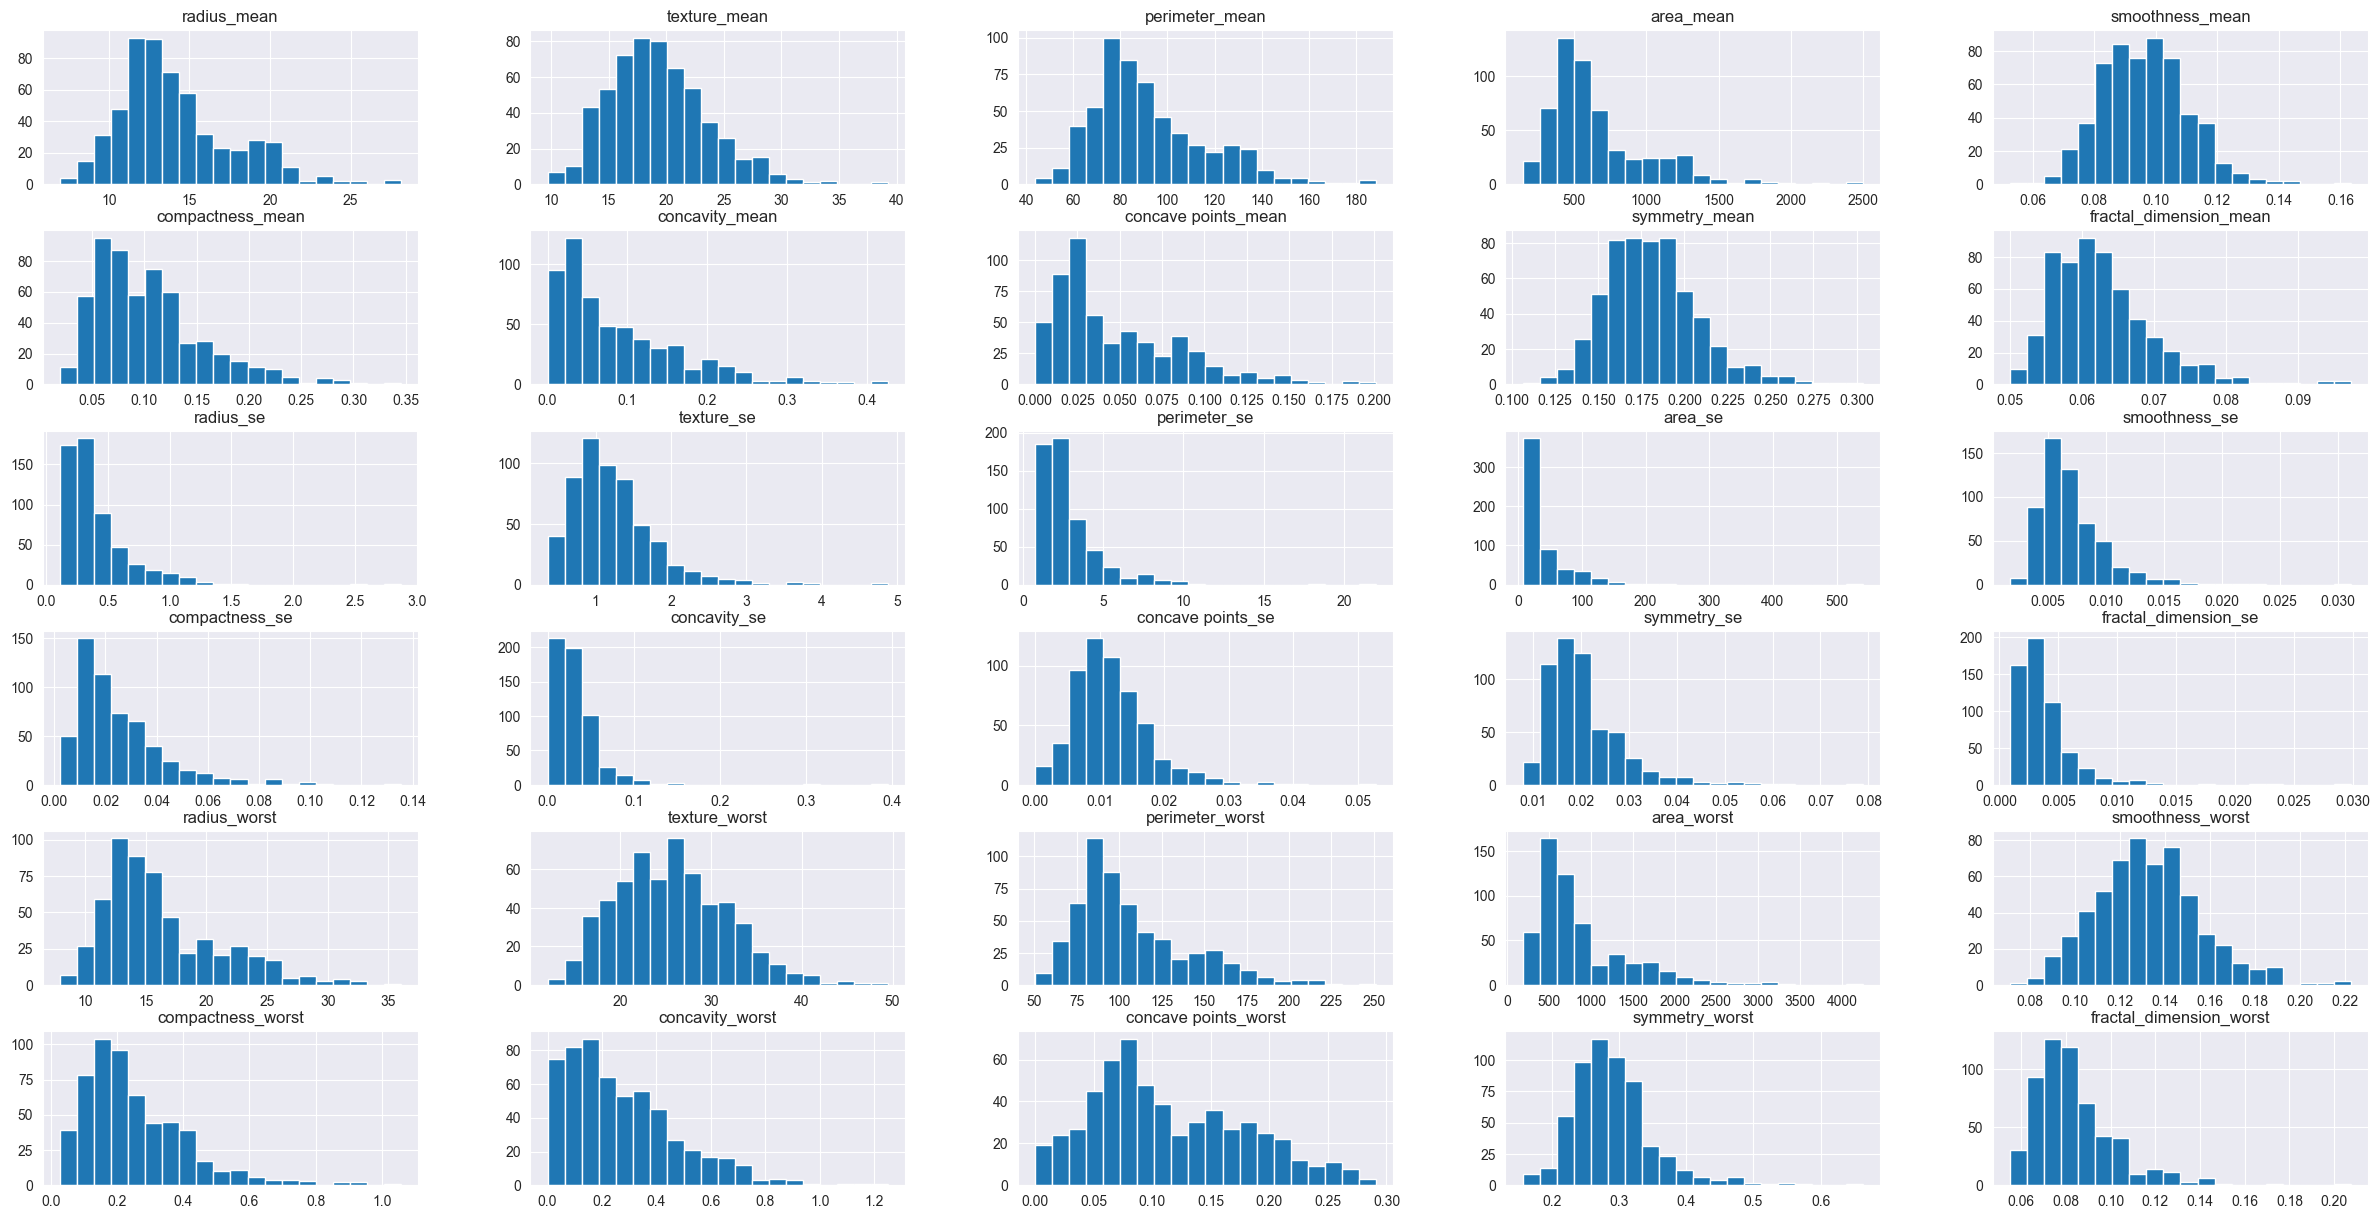

In [13]:
data.hist(figsize=(30,15), bins=20)


**5. Criei um dataframe com os valores left skewed**

In [16]:
column_skewed_list = ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                              'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                              'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst',
                              'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                              'symmetry_worst', 'fractal_dimension_worst']
# Criei um dataframe com as colunas da lista acima
data_skewed = data[column_skewed_list]
data_skewed.head()

,area_mean,compactness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1001.0,0.27760,0.3001,0.14710,0.07871,1.0950,0.9053,8.589,153.40,0.006399,...,0.05373,0.03003,0.006193,17.33,2019.0,0.6656,0.7119,0.2654,0.4601,0.11890
1,1326.0,0.07864,0.0869,0.07017,0.05667,0.5435,0.7339,3.398,74.08,0.005225,...,0.01860,0.01389,0.003532,23.41,1956.0,0.1866,0.2416,0.1860,0.2750,0.08902
2,1203.0,0.15990,0.1974,0.12790,0.05999,0.7456,0.7869,4.585,94.03,0.006150,...,0.03832,0.02250,0.004571,25.53,1709.0,0.4245,0.4504,0.2430,0.3613,0.08758
3,386.1,0.28390,0.2414,0.10520,0.09744,0.4956,1.1560,3.445,27.23,0.009110,...,0.05661,0.05963,0.009208,26.50,567.7,0.8663,0.6869,0.2575,0.6638,0.17300
4,1297.0,0.13280,0.1980,0.10430,0.05883,0.7572,0.7813,5.438,94.44,0.011490,...,0.05688,0.01756,0.005115,16.67,1575.0,0.2050,0.4000,0.1625,0.2364,0.07678


**5.1. Verifiquei a distribuição dos dados do dataframe data_skewed**

array([[<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'texture_worst'}>],
       [<Axes: title={'center': 'area_worst'}>,
        <Axes: title={'center': 'compactness_worst'}>,
        <Axes: title={'center': 'concavity_worst'}>,
        <Axes: title={'center': 'concave points_worst'}>,
        <Axe

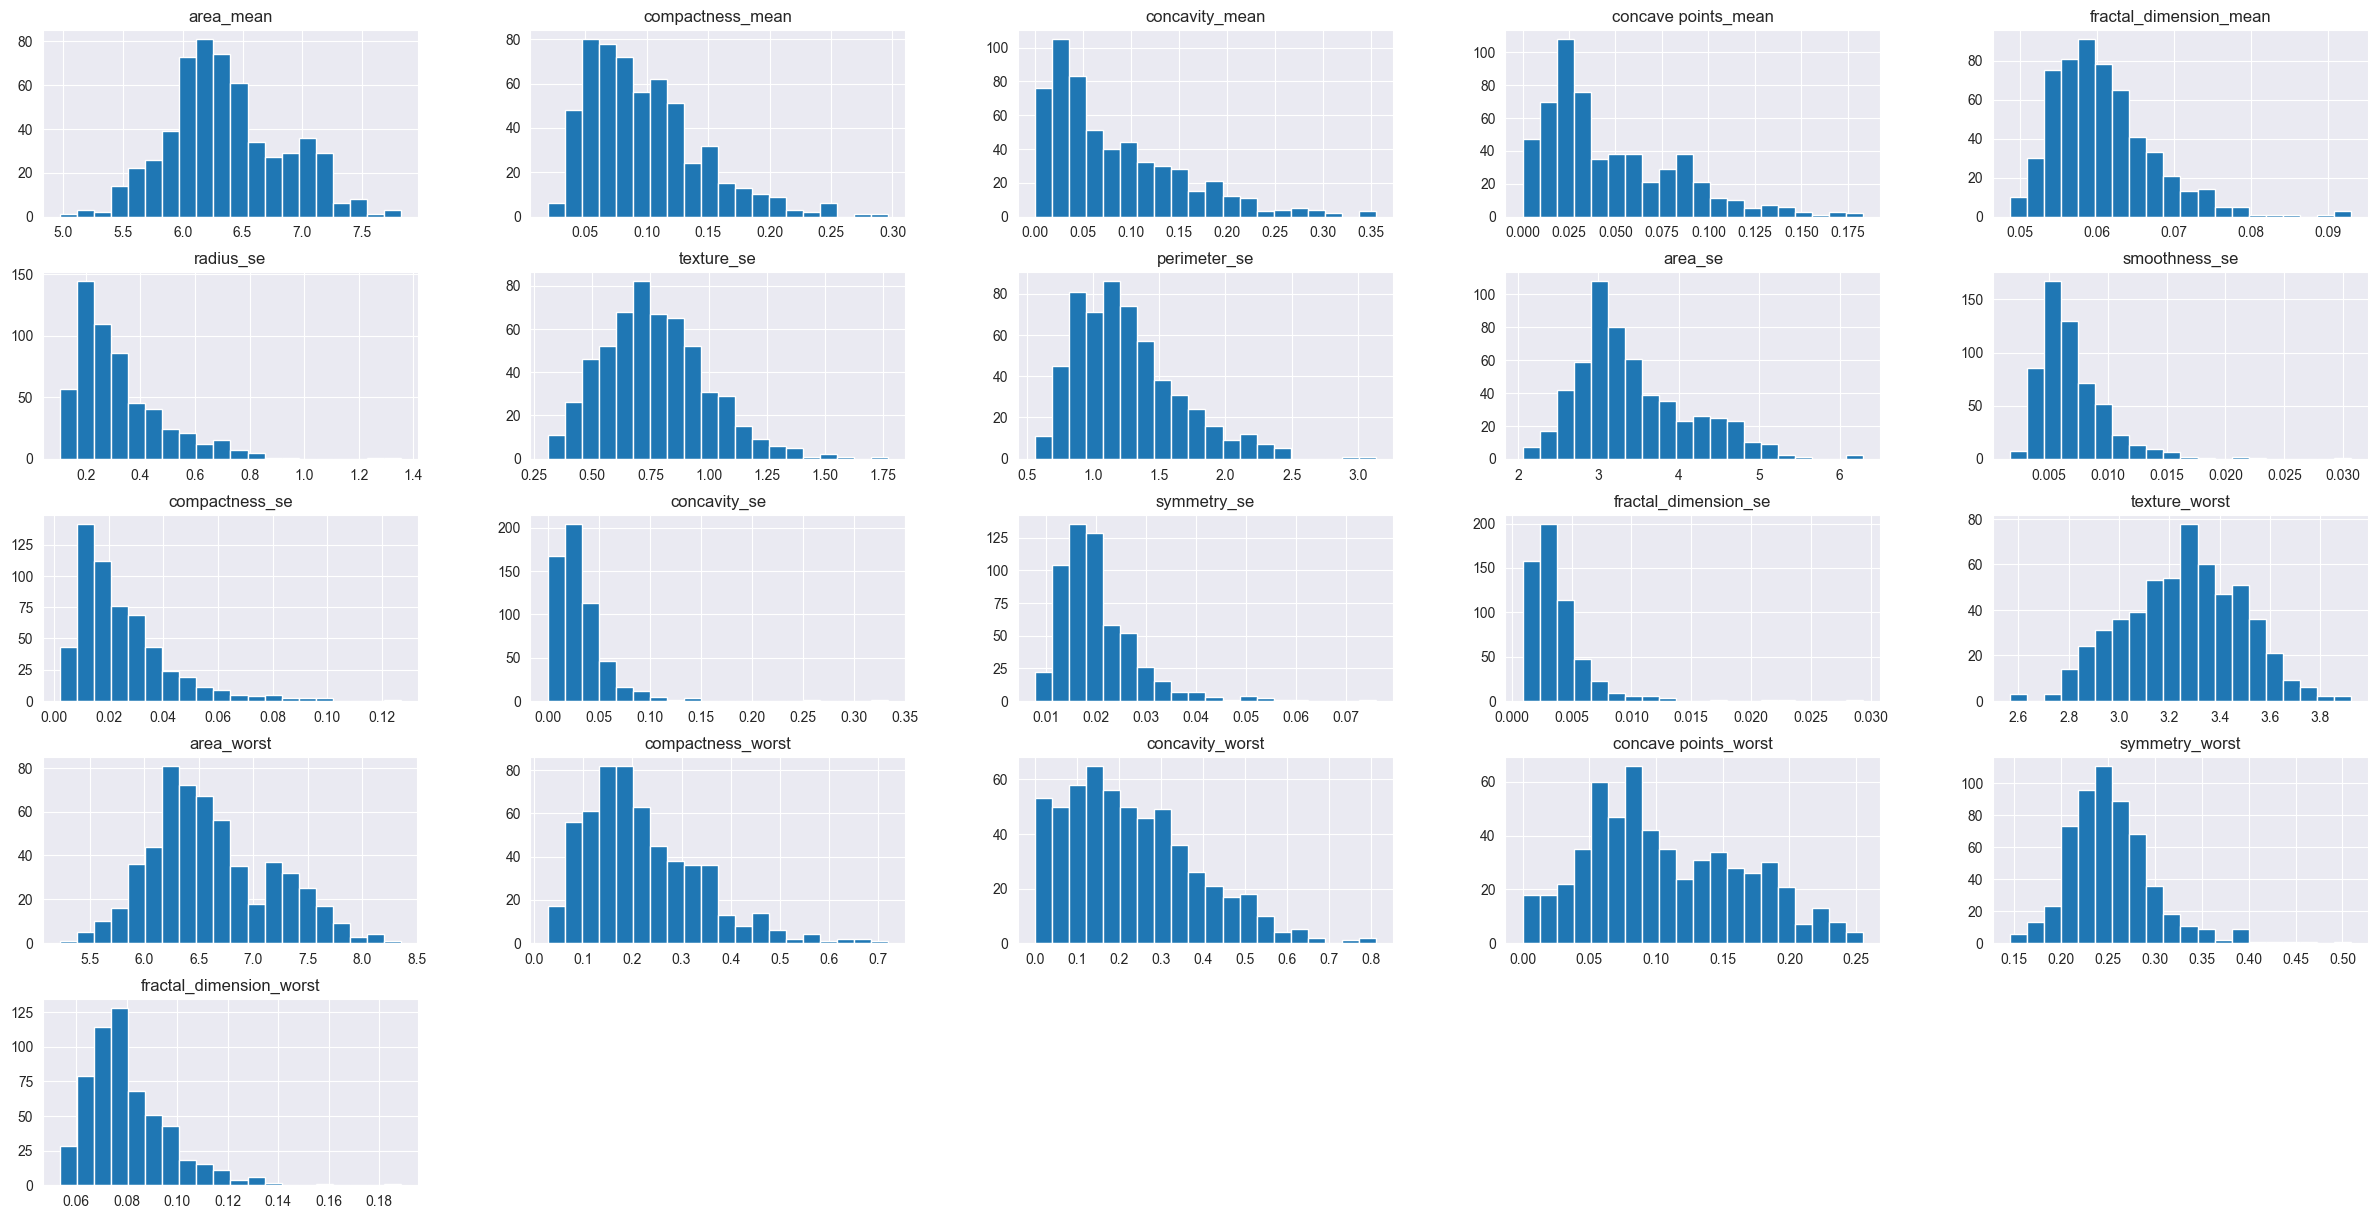

In [19]:
data_skewed_log.hist(figsize=(30,15), bins=20)

**6. Apliquei a transformação logarítmica no dataframe data_skewed**

In [18]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
data_skewed_log = transformer.transform(data_skewed)
data_skewed_log = pd.DataFrame(data_skewed_log, columns=column_skewed_list)
data_skewed_log.head()

C:\Users\estagiario1.extensao\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,area_mean,compactness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6.909753,0.244983,0.262441,0.137237,0.075766,0.739554,0.644639,2.260617,5.039547,0.006379,...,0.052336,0.029588,0.006174,2.908539,7.610853,0.510185,0.537604,0.235388,0.378505,0.112346
1,7.190676,0.075701,0.083330,0.067818,0.055122,0.434053,0.550373,1.481150,4.318554,0.005211,...,0.018429,0.013794,0.003526,3.194993,7.579168,0.171092,0.216401,0.170586,0.242946,0.085278
2,7.093405,0.148334,0.180153,0.120357,0.058259,0.557098,0.580482,1.720084,4.554193,0.006131,...,0.037604,0.022251,0.004561,3.278276,7.444249,0.353821,0.371839,0.217528,0.308440,0.083955
3,5.958683,0.249902,0.216240,0.100026,0.092980,0.402527,0.768255,1.491780,3.340385,0.009069,...,0.055066,0.057920,0.009166,3.314186,6.343353,0.623958,0.522893,0.229126,0.509104,0.159565
4,7.168580,0.124692,0.180653,0.099212,0.057165,0.563722,0.577343,1.862218,4.558498,0.011424,...,0.055321,0.017408,0.005102,2.871868,7.362645,0.186480,0.336472,0.150573,0.212204,0.073975


**7. Criei o dataframe do modelo, dropando as colunas skewed e agregando ao dataframe skewed_log**

In [21]:
data_model = data.drop(column_skewed_list, axis=1)
data_model = pd.concat([data_model, data_skewed_log], axis=1)
data_model.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,symmetry_mean,concave points_se,radius_worst,perimeter_worst,smoothness_worst,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,0.11840,0.2419,0.01587,25.38,184.60,0.1622,...,0.052336,0.029588,0.006174,2.908539,7.610853,0.510185,0.537604,0.235388,0.378505,0.112346
1,M,20.57,17.77,132.90,0.08474,0.1812,0.01340,24.99,158.80,0.1238,...,0.018429,0.013794,0.003526,3.194993,7.579168,0.171092,0.216401,0.170586,0.242946,0.085278
2,M,19.69,21.25,130.00,0.10960,0.2069,0.02058,23.57,152.50,0.1444,...,0.037604,0.022251,0.004561,3.278276,7.444249,0.353821,0.371839,0.217528,0.308440,0.083955
3,M,11.42,20.38,77.58,0.14250,0.2597,0.01867,14.91,98.87,0.2098,...,0.055066,0.057920,0.009166,3.314186,6.343353,0.623958,0.522893,0.229126,0.509104,0.159565
4,M,20.29,14.34,135.10,0.10030,0.1809,0.01885,22.54,152.20,0.1374,...,0.055321,0.017408,0.005102,2.871868,7.362645,0.186480,0.336472,0.150573,0.212204,0.073975


**8. Renomeei as colunas do dataframe data_model para facilitar a compreensão**

In [23]:
data_model.columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'log_smoothness_mean', 'log_symmetry_mean', 'log_concave_points_se', 'log_radius_worst',
       'log_perimeter_worst', 'log_smoothness_worst', 'log_area_mean', 'log_compactness_mean',
       'log_concavity_mean', 'log_concave points_mean', 'log_fractal_dimension_mean',
       'log_radius_se', 'log_texture_se', 'log_perimeter_se', 'log_area_se', 'log_smoothness_se',
       'log_compactness_se', 'log_concavity_se', 'log_symmetry_se', 'log_fractal_dimension_se',
       'log_texture_worst', 'log_area_worst', 'log_compactness_worst', 'log_concavity_worst',
       'log_concave points_worst', 'log_symmetry_worst', 'log_fractal_dimension_worst']

In [24]:
data_model.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,log_smoothness_mean,log_symmetry_mean,log_concave_points_se,log_radius_worst,log_perimeter_worst,log_smoothness_worst,...,log_concavity_se,log_symmetry_se,log_fractal_dimension_se,log_texture_worst,log_area_worst,log_compactness_worst,log_concavity_worst,log_concave points_worst,log_symmetry_worst,log_fractal_dimension_worst
0,M,17.99,10.38,122.80,0.11840,0.2419,0.01587,25.38,184.60,0.1622,...,0.052336,0.029588,0.006174,2.908539,7.610853,0.510185,0.537604,0.235388,0.378505,0.112346
1,M,20.57,17.77,132.90,0.08474,0.1812,0.01340,24.99,158.80,0.1238,...,0.018429,0.013794,0.003526,3.194993,7.579168,0.171092,0.216401,0.170586,0.242946,0.085278
2,M,19.69,21.25,130.00,0.10960,0.2069,0.02058,23.57,152.50,0.1444,...,0.037604,0.022251,0.004561,3.278276,7.444249,0.353821,0.371839,0.217528,0.308440,0.083955
3,M,11.42,20.38,77.58,0.14250,0.2597,0.01867,14.91,98.87,0.2098,...,0.055066,0.057920,0.009166,3.314186,6.343353,0.623958,0.522893,0.229126,0.509104,0.159565
4,M,20.29,14.34,135.10,0.10030,0.1809,0.01885,22.54,152.20,0.1374,...,0.055321,0.017408,0.005102,2.871868,7.362645,0.186480,0.336472,0.150573,0.212204,0.073975


**9. Tratei a coluna 'diagnosis' utilizando o LabelEncoder**

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_model['diagnosis'] = le.fit_transform(data_model['diagnosis'])
data_model.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,log_smoothness_mean,log_symmetry_mean,log_concave_points_se,log_radius_worst,log_perimeter_worst,log_smoothness_worst,...,log_concavity_se,log_symmetry_se,log_fractal_dimension_se,log_texture_worst,log_area_worst,log_compactness_worst,log_concavity_worst,log_concave points_worst,log_symmetry_worst,log_fractal_dimension_worst
0,1,17.99,10.38,122.80,0.11840,0.2419,0.01587,25.38,184.60,0.1622,...,0.052336,0.029588,0.006174,2.908539,7.610853,0.510185,0.537604,0.235388,0.378505,0.112346
1,1,20.57,17.77,132.90,0.08474,0.1812,0.01340,24.99,158.80,0.1238,...,0.018429,0.013794,0.003526,3.194993,7.579168,0.171092,0.216401,0.170586,0.242946,0.085278
2,1,19.69,21.25,130.00,0.10960,0.2069,0.02058,23.57,152.50,0.1444,...,0.037604,0.022251,0.004561,3.278276,7.444249,0.353821,0.371839,0.217528,0.308440,0.083955
3,1,11.42,20.38,77.58,0.14250,0.2597,0.01867,14.91,98.87,0.2098,...,0.055066,0.057920,0.009166,3.314186,6.343353,0.623958,0.522893,0.229126,0.509104,0.159565
4,1,20.29,14.34,135.10,0.10030,0.1809,0.01885,22.54,152.20,0.1374,...,0.055321,0.017408,0.005102,2.871868,7.362645,0.186480,0.336472,0.150573,0.212204,0.073975


**10. Verifiquei a correlação entre as variáveis**

<Axes: >

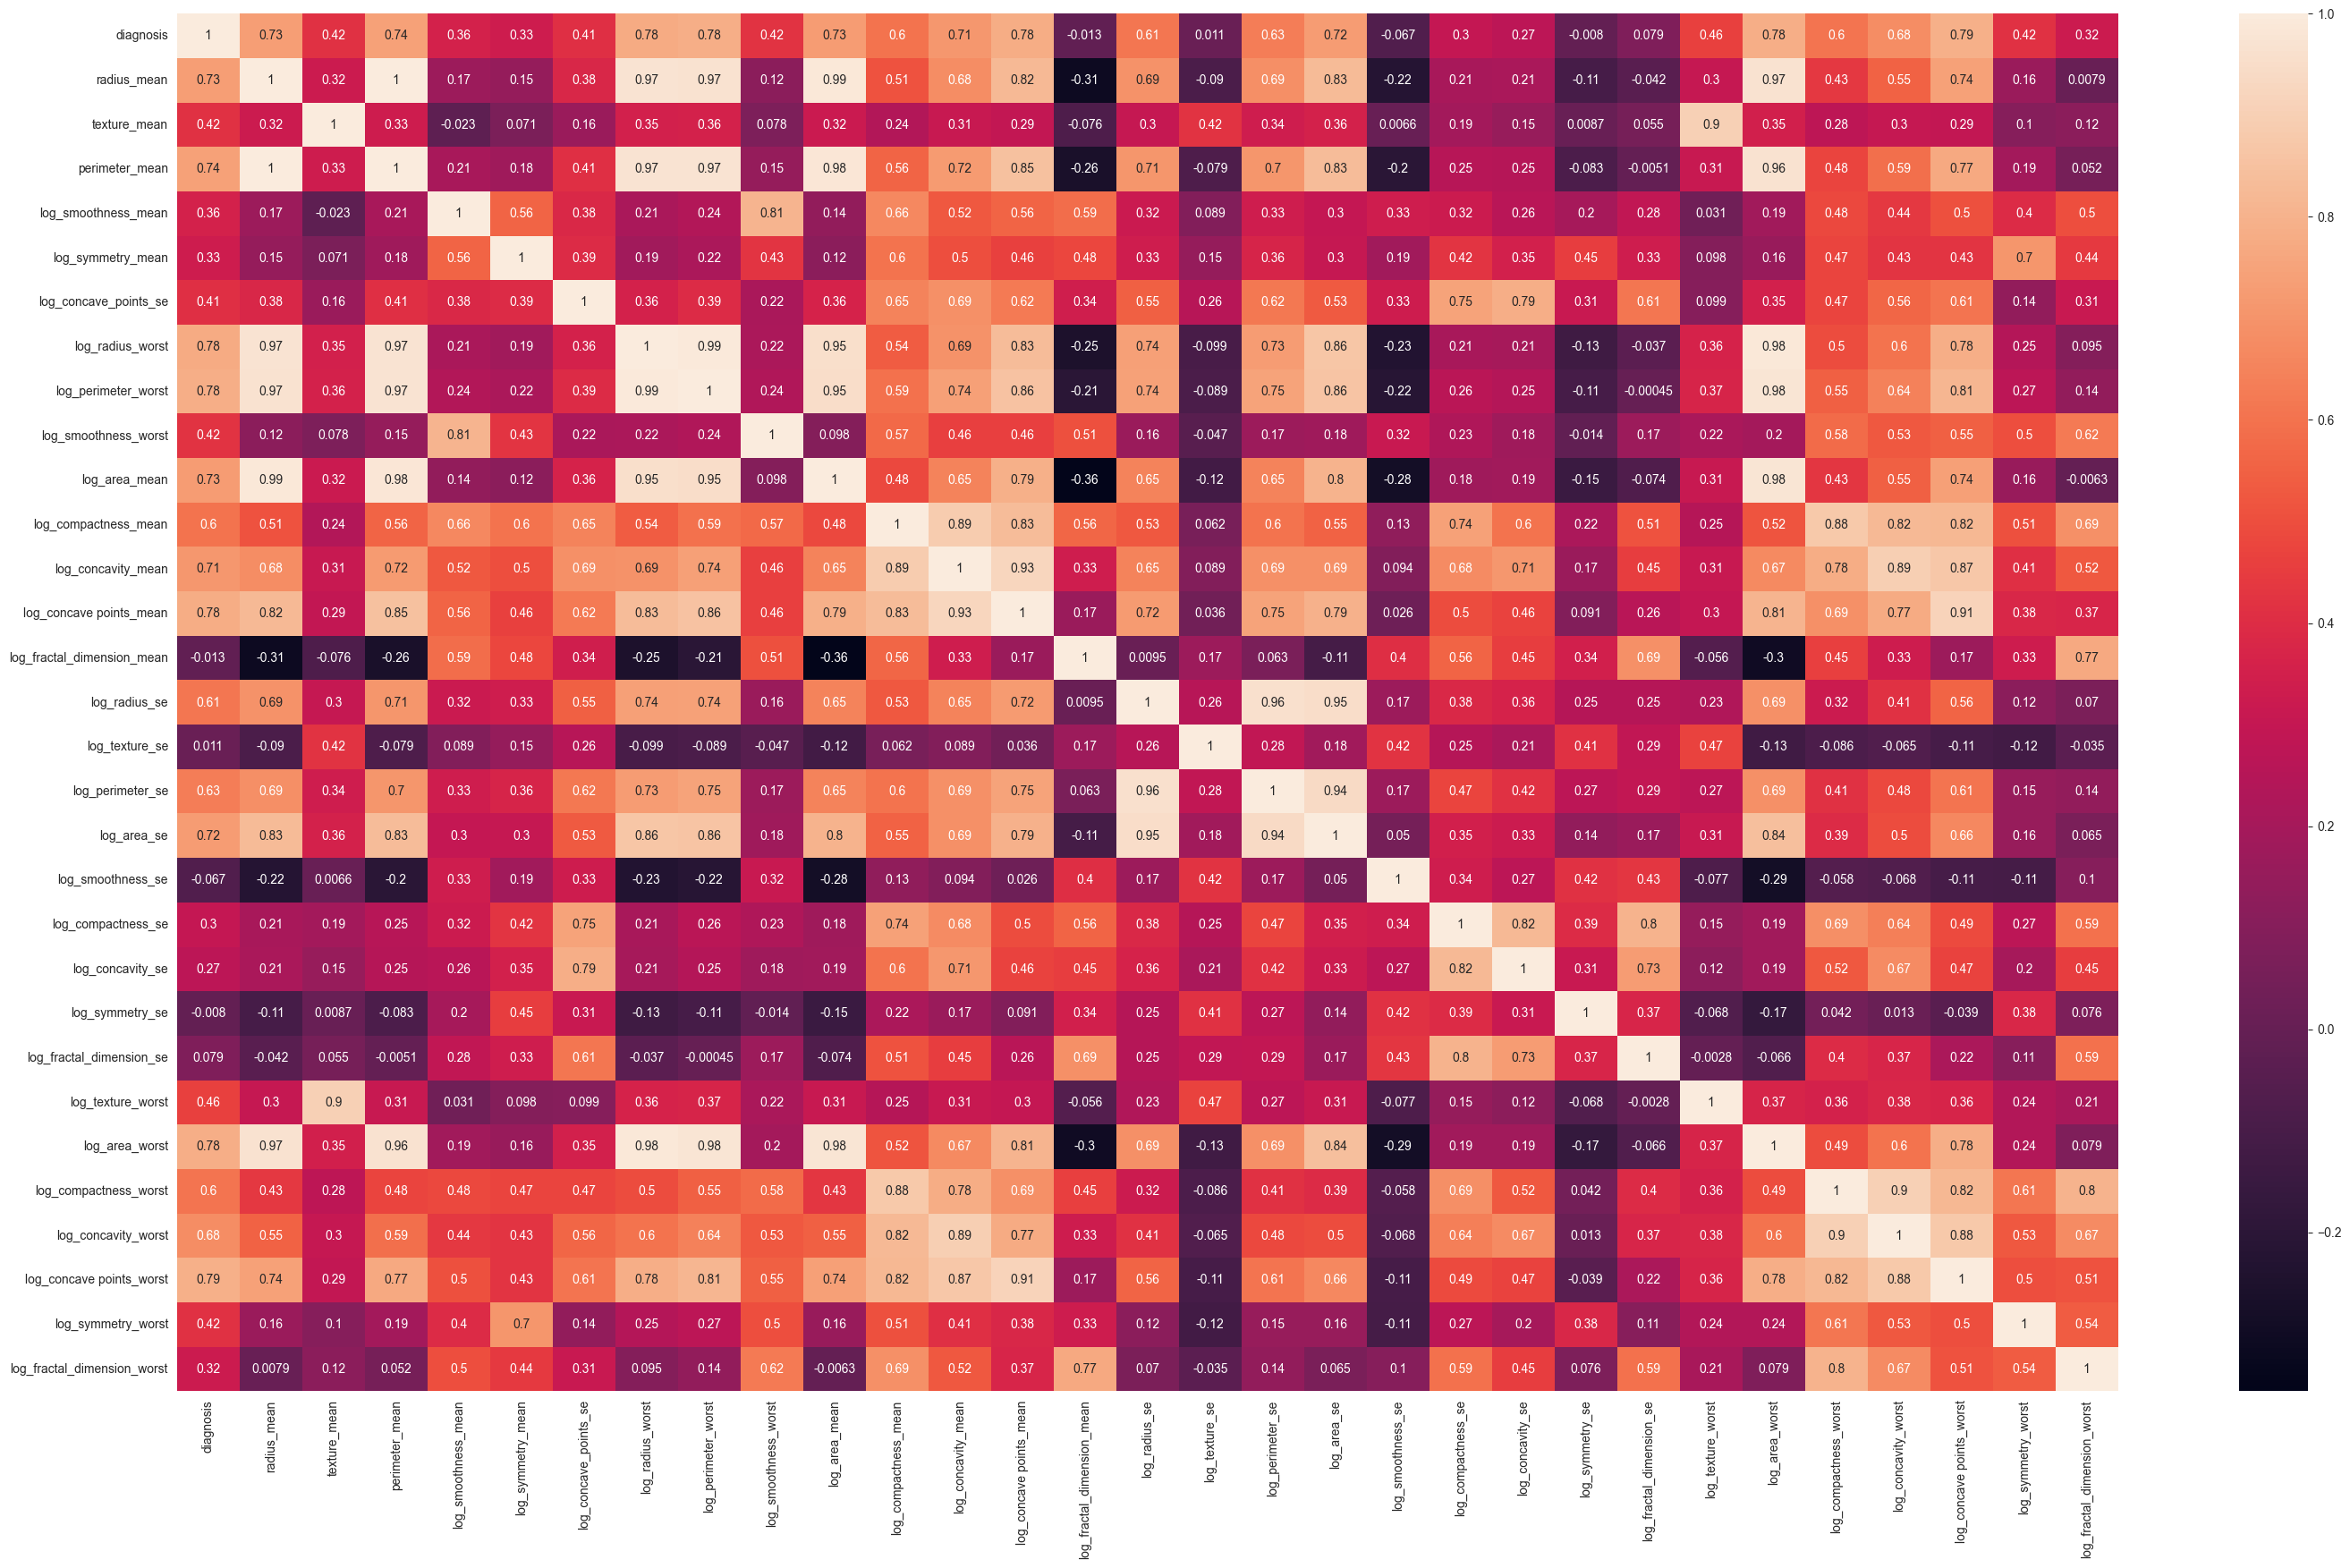

In [29]:
fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(data_model.corr(), annot=True, ax=ax)

**11. Verifiquei a correlação entre as variáveis e a variável target**

In [31]:
target = data_model['diagnosis']
corr = data_model.corrwith(target).sort_values(ascending=False)
corr = corr.drop('diagnosis')
corr

log_concave points_worst       0.791647
log_area_worst                 0.784118
log_perimeter_worst            0.782914
log_concave points_mean        0.781475
log_radius_worst               0.776454
perimeter_mean                 0.742636
radius_mean                    0.730029
log_area_mean                  0.727979
log_area_se                    0.724995
log_concavity_mean             0.709769
log_concavity_worst            0.679810
log_perimeter_se               0.633373
log_radius_se                  0.612239
log_compactness_worst          0.602957
log_compactness_mean           0.600909
log_texture_worst              0.462077
log_smoothness_worst           0.421465
log_symmetry_worst             0.415900
texture_mean                   0.415185
log_concave_points_se          0.408042
log_smoothness_mean            0.358560
log_symmetry_mean              0.330499
log_fractal_dimension_worst    0.324416
log_compactness_se             0.296425
log_concavity_se               0.273987


**12. Extraí o dataframe data_model para um arquivo csv**

In [32]:
data_model.to_csv('breast-cancer-model.csv', index=False)